Importing The Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline

Data Collection and Preprocessing

In [ ]:
# loading the dataset to dataframe
# download the dataset from https://www.kaggle.com/datasets/ninzaami/loan-predication
df = pd.read_csv('train_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# number of missing values in dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df = df.drop(['Loan_ID'], axis = 1)


In [ ]:
df.shape

(614, 12)

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [ ]:
df['Dependents'] .value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# replace 3+ to 4
df['Dependents'].replace(to_replace='3+', value=4, inplace=True)
df.Dependents.value_counts()


0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [ ]:
df['Dependents'] = df['Dependents'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 57.7+ KB


<Axes: xlabel='Credit_History', ylabel='count'>

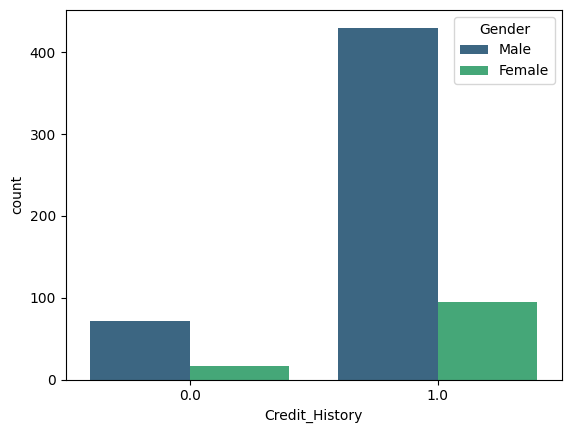

In [ ]:
sns.countplot(x="Credit_History",hue='Gender', data=df, palette="viridis")


<Axes: xlabel='Property_Area', ylabel='count'>

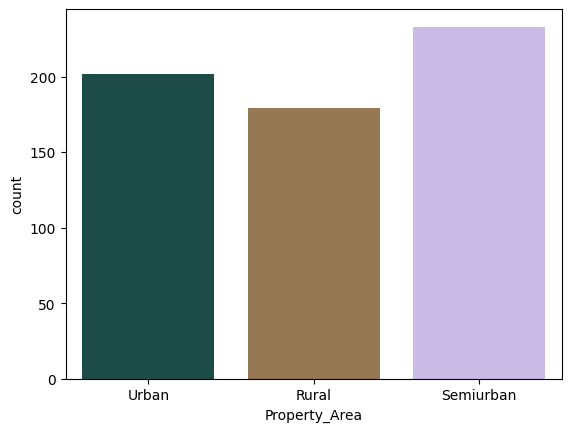

In [ ]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")

In [ ]:
df = pd.get_dummies(df)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1


In [ ]:
df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No', 'Property_Area_Rural' ], axis=1, inplace=True)

In [ ]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
## Trianing the model SVM
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = classifier.predict(X_train)
accuracy_score(y_pred, y_train)

0.7963340122199593

In [ ]:
y_pred = classifier.predict(X_test)
accuracy_score(y_pred, y_test)

0.7642276422764228